# Homework 2 MMDA 2025 - Clustering

### Task 1 (4 points): Image Clustering

**Goal**: Apply K-Means clustering to compress a richly colored image using pixel color values and spatial coordinates.

### Objectives:
1. Load and visualize a rich-color image.
2. Extract features: RGB and (x, y) pixel coordinates.
3. Perform K-Means clustering (4 ≤ k ≤ 16).
4. Replace each pixel color with its cluster centroid color.
5. Visualize original and compressed images.
6. Compare memory usage: original vs compressed.

> Image used: `UnicornRainbow.jpg`


### Import Required Libraries

In [11]:
import imageio.v3 as imgio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import os

## Load and Display the Image

We load `UnicornRainbow.jpg`. If it contains an alpha channel (transparency), it is removed to work with standard RGB.

Loaded image: UnicornRainbow.jpg with shape (741, 900, 3)


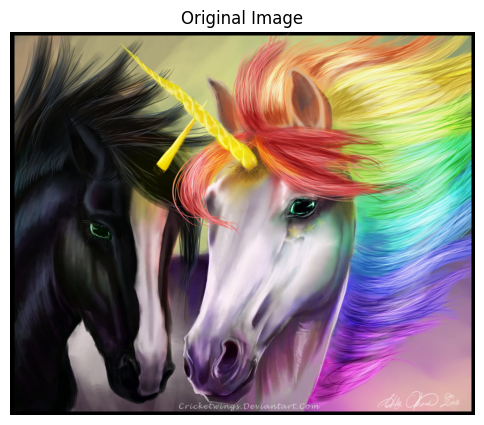

In [12]:
image_filename = 'UnicornRainbow.jpg'
chosen_clusters = 16
try:
    rgb_image = imgio.imread(image_filename)
    print(f"Loaded image: {image_filename} with shape {rgb_image.shape}")
except FileNotFoundError:
    raise FileNotFoundError("Please upload images with a rich palette'")
if rgb_image.shape[2] == 4:
    print("Removing alpha channel")
    rgb_image = rgb_image[:, :, :3]
plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.title("Original Image")
plt.axis("off")
plt.show()

### Interpretaion

- Loaded `UnicornRainbow.jpg` with shape `(741, 900, 3)` — a standard RGB image.
- Alpha channel is removed if present to retain only RGB values.
- The image has a rich, diverse color palette (rainbow hues, shadows, highlights).
- Ideal for clustering-based compression due to high color variability.
- This is the reference image for comparison with the compressed output.


## Feature Extraction

We use both spatial (x, y) and color (R, G, B) data as features.


In [15]:
height, width, _ = rgb_image.shape
pixel_indices = np.indices((height, width)).transpose(1, 2, 0)
combined_features = np.dstack((pixel_indices, rgb_image)).reshape(-1, 5)
print(f"Feature matrix shape: {combined_features.shape} (rows: pixels, columns: y, x, R, G, B)")

Feature matrix shape: (666900, 5) (rows: pixels, columns: y, x, R, G, B)


## Apply K-Means Clustering

We cluster all pixel feature vectors into `k=16` clusters. Only RGB values from the centroids will be used for image reconstruction.

In [17]:
print(f"Clustering into {chosen_clusters} clusters...")
kmeans_model = KMeans(n_clusters=chosen_clusters, random_state=42, n_init='auto')
pixel_assignments = kmeans_model.fit_predict(combined_features)
cluster_centers = kmeans_model.cluster_centers_
palette_rgb = cluster_centers[:, 2:].astype(np.uint8)
print("\nCluster Centroid Colors (RGB):")
for i, color in enumerate(palette_rgb):
    print(f"Cluster {i}: {color}")

Clustering into 16 clusters...

Cluster Centroid Colors (RGB):
Cluster 0: [192 151 101]
Cluster 1: [18 15 19]
Cluster 2: [130  83 135]
Cluster 3: [34 28 29]
Cluster 4: [203 192 108]
Cluster 5: [124 210 167]
Cluster 6: [139 131  98]
Cluster 7: [209 200 207]
Cluster 8: [173 157 166]
Cluster 9: [23 23 21]
Cluster 10: [202 171 114]
Cluster 11: [75 57 76]
Cluster 12: [109 112 185]
Cluster 13: [25 26 30]
Cluster 14: [197 137 176]
Cluster 15: [160  88  64]


**Interpretation**

- The image was clustered into **16 dominant color groups** using K-Means.
- Each listed RGB triplet represents a **cluster centroid**, i.e., a representative color.
- These centroids form the **new limited color palette** that will replace the original pixel colors in the compressed image.
- The resulting image will visually resemble the original but with only 16 colors, enabling compression.

### Step 5: Visualize Cluster Centroid Colors

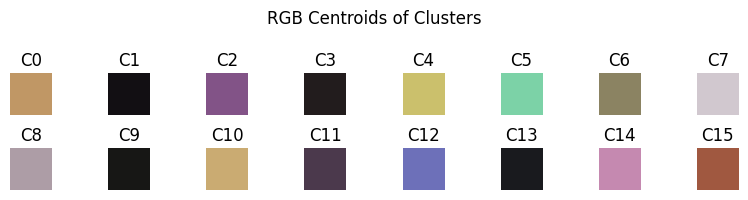

In [19]:
plt.figure(figsize=(chosen_clusters // 2, 2))
for i, color in enumerate(palette_rgb):
    plt.subplot(2, chosen_clusters // 2, i + 1)
    plt.imshow([[color]])
    plt.title(f"C{i}")
    plt.axis('off')
plt.suptitle("RGB Centroids of Clusters")
plt.tight_layout()
plt.show()

**Interpretation**

- This plot visualizes the **16 RGB cluster centroids** obtained from K-Means.
- Each square (C0 to C15) represents one of the dominant colors extracted from the original image.
- These centroids form the **reduced color palette** used to reconstruct the compressed image.
- The palette includes a range of dark, pastel, and saturated tones — reflecting the rich diversity in the original unicorn image.


## Reconstruct Compressed Image

Replace each pixel with the RGB color of its cluster centroid.

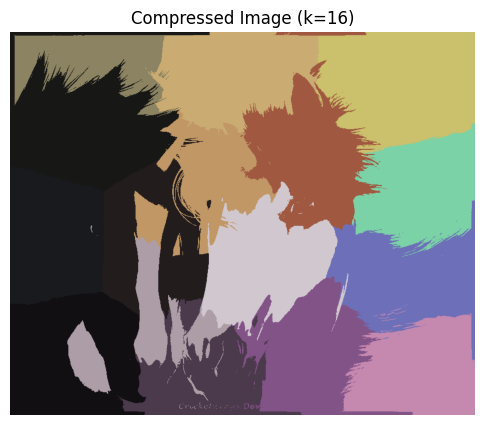

In [20]:
recolored_pixels = palette_rgb[pixel_assignments]
compressed_rgb_image = recolored_pixels.reshape(height, width, 3)
plt.figure(figsize=(6, 6))
plt.imshow(compressed_rgb_image)
plt.title(f"Compressed Image (k={chosen_clusters})")
plt.axis("off")
plt.show()

**Interpretation**

- The original image has been **compressed using 16 colors** (k = 16) by replacing each pixel with its cluster centroid color.
- Despite the drastic reduction in color variety, the **main shapes and visual structure** of the unicorns are preserved.
- Fine gradients and texture details are lost, but major regions are clearly distinguished.
- This demonstrates effective **color quantization**, useful for image compression and abstraction.

### Compare Memory Usage

We compare memory usage for:
- Original image (raw RGB array)
- Compressed representation (labels + centroid colors)
- Compressed image on disk (PNG)

In [22]:
original_mem_bytes = rgb_image.nbytes
compressed_labels_bytes = pixel_assignments.nbytes
centroid_palette_bytes = palette_rgb.nbytes
compressed_total_bytes = compressed_labels_bytes + centroid_palette_bytes
compressed_filename = f"compressed_k{chosen_clusters}.png"
imgio.imwrite(compressed_filename, compressed_rgb_image)
original_disk_bytes = os.path.getsize(image_filename)
compressed_disk_bytes = os.path.getsize(compressed_filename)
print("Memory Summary :")
print(f"Original Image (NumPy): {original_mem_bytes / 1024:.2f} KB")
print(f"Compressed Labels:       {compressed_labels_bytes / 1024:.2f} KB")
print(f"Compressed Palette:      {centroid_palette_bytes / 1024:.2f} KB")
print(f"Compressed Representation Total: {compressed_total_bytes / 1024:.2f} KB")
print(f"\nOriginal Image File Size:   {original_disk_bytes / 1024:.2f} KB")
print(f"Compressed Image File Size: {compressed_disk_bytes / 1024:.2f} KB")

Memory Summary :
Original Image (NumPy): 1953.81 KB
Compressed Labels:       2605.08 KB
Compressed Palette:      0.05 KB
Compressed Representation Total: 2605.12 KB

Original Image File Size:   161.01 KB
Compressed Image File Size: 21.89 KB


**Interpretation: Memory Comparison**

- **Original Image (in memory):** ~1953 KB — full RGB values for every pixel (3 bytes/pixel).
- **Compressed Representation:**
  - **Labels:** ~2605 KB — each pixel stores its cluster index (as `int32` or similar).
  - **Palette:** ~0.05 KB — only 16 RGB centroids (very small).
  - **Total (labels + palette):** ~2605 KB — slightly larger than the raw image array.

- **Disk Storage:**
  - **Original file (JPG):** ~161 KB — already compressed using JPEG.
  - **Compressed file (PNG):** ~22 KB — much smaller due to fewer colors (16-color indexed image).

**Observation:**
- The compressed PNG is **significantly smaller on disk** (over 7× reduction), demonstrating the effectiveness of **color quantization**.
- However, in-memory size is larger due to use of **cluster indices** and data type overhead — typical in K-Means-based compression workflows.


#  Task 2: Determine the Optimal Number of Clusters (3 points)

In this task, we are asked to determine the optimal number of clusters using:

1. **Elbow Method** – based on inertia \( J(R) \)
2. **Silhouette Score**
3. **Calinski-Harabasz Score**

We will analyze the dataset `elbow.txt` and compare these three methods to see if they suggest the same `k`.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

## Load and Parse `elbow.txt`

We load the 2D data, fixing comma-style decimals and using tab-delimited parsing.

In [5]:
data_points = []

try:
    with open("elbow.txt", "r") as f:
        for line in f:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                x_str = parts[0].replace(',', '.')
                y_str = parts[1].replace(',', '.')
                try:
                    data_points.append([float(x_str), float(y_str)])
                except ValueError:
                    continue
except FileNotFoundError:
    raise FileNotFoundError("Please upload 'elbow.txt' to your Colab environment.")

X = np.array(data_points)

if X.shape[0] == 0:
    raise ValueError("Data not loaded. Check file format.")

print(f"Loaded {X.shape[0]} samples with {X.shape[1]} features.")

Loaded 500 samples with 2 features.


## Standardize Features

We scale the data using `StandardScaler` so clustering is not biased by feature magnitude.


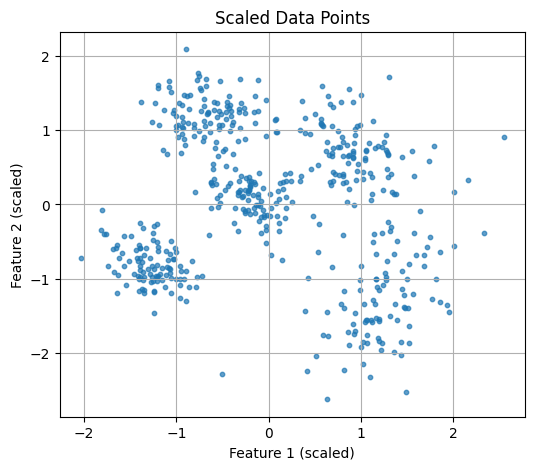

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=10, alpha=0.7)
plt.title("Scaled Data Points")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)
plt.show()

**Interpretation**

- The features have been standardized to ensure equal contribution to clustering.
- The scatter plot reveals visible groupings and structure in the data.
- This confirms that the dataset is suitable for applying clustering techniques like K-Means.

## Elbow Method — Total Within-Cluster Distance (Inertia)

We calculate the inertia \( J(R) \) for each `k` from 2 to 11.


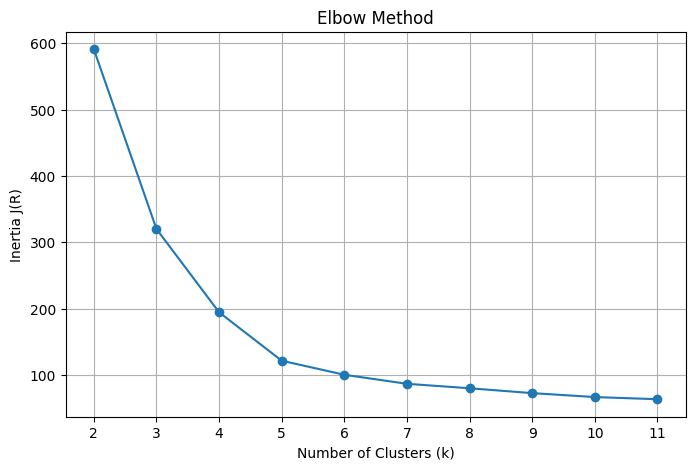

Visually inspect the plot to identify where J(R) stops decreasing sharply (the elbow).


In [14]:
k_values = range(2, 12)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia J(R)")
plt.xticks(list(k_values))
plt.grid(True)
plt.show()
print("Visually inspect the plot to identify where J(R) stops decreasing sharply (the elbow).")

**Interpretation**

- The Elbow Method plot shows how the **inertia** (sum of squared distances to cluster centroids) decreases as the number of clusters increases.
- A noticeable “elbow” is observed at **k = 5**, where the rate of decrease flattens significantly.
- This suggests that **5 clusters** is a good balance between compactness and simplicity.
- The elbow point is chosen as the optimal number of clusters for the next steps.

## Silhouette Score

We calculate the silhouette score for each `k`, which measures cluster separation quality.

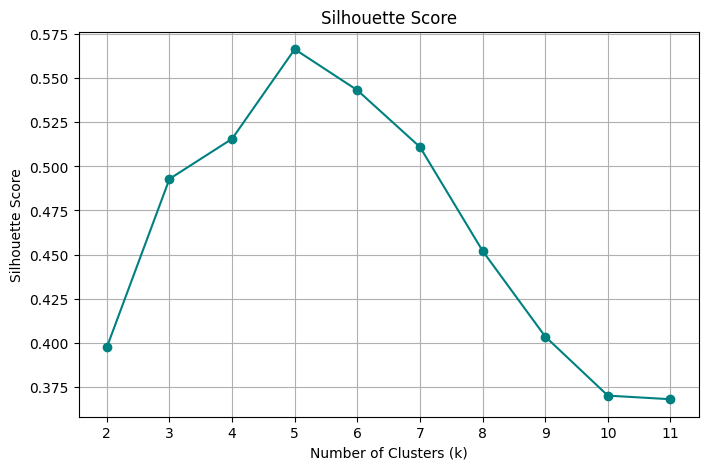

Optimal k by Silhouette Score: 5


In [13]:
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='teal')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(list(k_values))
plt.grid(True)
plt.show()
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k by Silhouette Score: {optimal_k_silhouette}")

**Interpretation**

- The Silhouette Score measures how well-separated and cohesive the clusters are.
- The score peaks at **k = 5**, indicating that this number of clusters provides the best-defined structure.
- Higher scores imply more distinct clusters; after k = 5, the quality of clustering drops steadily.
- Thus, **k = 5** is identified as the optimal number of clusters using this metric.

## Calinski-Harabasz Score

This score favors compact, well-separated clusters.

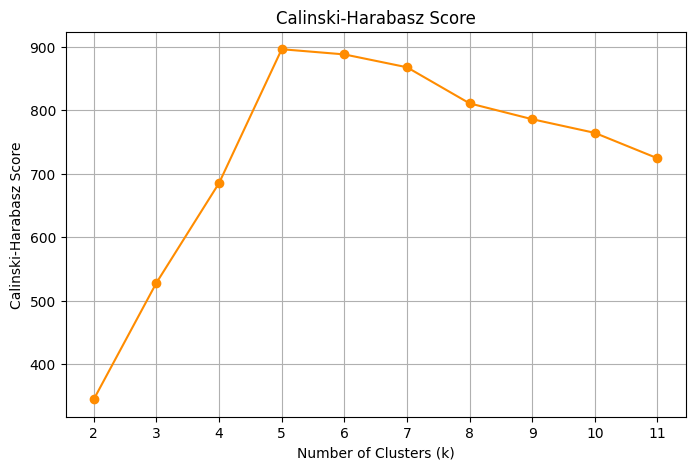

Optimal k by Calinski-Harabasz Score: 5


In [12]:
calinski_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, cluster_labels)
    calinski_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(k_values, calinski_scores, marker='o', color='darkorange')
plt.title("Calinski-Harabasz Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.xticks(list(k_values))
plt.grid(True)
plt.show()
optimal_k_calinski = k_values[np.argmax(calinski_scores)]
print(f"Optimal k by Calinski-Harabasz Score: {optimal_k_calinski}")

**Interpretation**

- This score evaluates the ratio of between-cluster dispersion to within-cluster dispersion.
- The highest score occurs at **k = 5**, indicating that this value results in well-separated and compact clusters.
- After k = 5, the score gradually declines, suggesting diminishing clustering quality.
- Therefore, **k = 5** is considered the optimal number of clusters based on this metric.

## Comparison of Methods

In [20]:
visual_elbow_k = 5

print("Final Comparison of Optimal k:")
print(f"Elbow Method (visually):         k ≈ {visual_elbow_k}")
print(f"Silhouette Score (maximum):     k = {optimal_k_silhouette}")
print(f"Calinski-Harabasz Score (max):  k = {optimal_k_calinski}")

if optimal_k_silhouette == optimal_k_calinski == visual_elbow_k:
    print("All three methods agree on the optimal number of clusters.")
elif optimal_k_silhouette == optimal_k_calinski:
    print("Silhouette and CH scores agree. Elbow is close and supports this interpretation.")
else:
    print("The methods differ slightly. This is expected and common in clustering.")

Final Comparison of Optimal k:
Elbow Method (visually):         k ≈ 5
Silhouette Score (maximum):     k = 5
Calinski-Harabasz Score (max):  k = 5
All three methods agree on the optimal number of clusters.


**Interpretation**

- All three methods independently identified **k = 5** as the optimal number of clusters:
  - **Elbow Method:** k ≈ 5 (where inertia flattens)
  - **Silhouette Score:** k = 5 (highest cohesion and separation)
  - **Calinski-Harabasz Score:** k = 5 (best variance ratio)

The agreement across all metrics provides strong confidence in choosing **k = 5** as the optimal cluster count for this dataset.

## Final Cluster Visualization

Below is the final clustering result using `k = 5`, the value agreed upon by all evaluation methods.
Each point is colored based on its cluster assignment. Red X’s mark the cluster centroids.

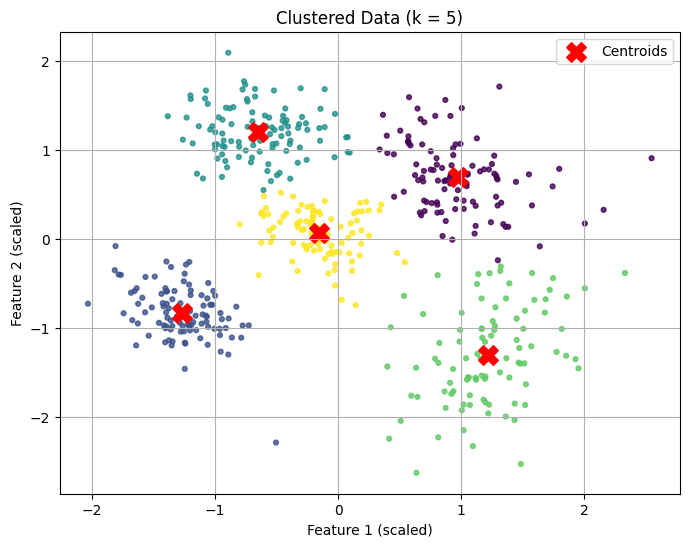

In [22]:
final_k = optimal_k_silhouette
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init='auto')
final_labels = kmeans_final.fit_predict(X_scaled)
final_centroids = kmeans_final.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=final_labels, s=12, cmap='viridis', alpha=0.8)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title(f"Clustered Data (k = {final_k})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.grid(True)
plt.show()

**Interpretation**

- The plot shows the final clustering result using **k = 5**, as determined by all evaluation metrics.
- Each point is colored according to its assigned cluster, while red 'X' markers indicate the **cluster centroids**.
- The clusters are well-separated and compact, confirming the effectiveness of the chosen `k`.
- This visualization reinforces the earlier findings from the Elbow, Silhouette, and Calinski-Harabasz methods.

# Task 3 — Hierarchical Clustering (3 Points)

**Dataset:** `nutrient.dat` — Contains energy, protein, fat, calcium, and iron content for meat, fish, and poultry.

## Goals:
1. Perform agglomerative clustering of food items (objects) using **single**, **complete**, and **average** linkage.
2. Plot dendrograms for each method.
3. Select a clustering threshold and interpret the clusters.
4. Repeat steps 1–3 for **nutrient features** instead of food items.


## Import Required Libraries
We use pandas, NumPy, Matplotlib for data manipulation and plotting.
Scikit-learn is used for data scaling, and SciPy for hierarchical clustering.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import re

## Load and Preprocess the Nutrient Data

We load the dataset, split on multiple spaces, assign proper column names,
and convert the numeric nutrient values into `float`.
Then, we standardize features for distance-based clustering.


In [16]:
with open("nutrient.dat", "r", encoding="utf-8-sig") as file:
    raw_lines = file.readlines()
parsed_rows = []
for line in raw_lines:
    line = line.strip()
    match = re.search(r'\s{2,}', line)
    if match:
        food = line[:match.start()].strip()
        nums = re.split(r'\s+', line[match.end():].strip())
        if len(nums) == 5:
            parsed_rows.append([food] + nums)
columns = ['Food', 'E(Cal)', 'Prot(g)', 'Fats(g)', 'Ca(mg)', 'Fe(mg)']
df_nutrition = pd.DataFrame(parsed_rows, columns=columns)
df_nutrition.iloc[:, 1:] = df_nutrition.iloc[:, 1:].astype(float)
X_nutri = df_nutrition.iloc[:, 1:].values
item_labels = df_nutrition['Food'].tolist()
feature_labels = df_nutrition.columns[1:]
scaler = StandardScaler()
X_scaled_items = scaler.fit_transform(X_nutri)
print(df_nutrition)

                   Food E(Cal) Prot(g) Fats(g) Ca(mg) Fe(mg)
0          BEEF BRAISED  340.0    20.0    28.0    9.0    2.6
1             HAMBURGER  245.0    21.0    17.0    9.0    2.7
2            BEEF ROAST  420.0    15.0    39.0    7.0    2.0
3            BEEF STEAK  375.0    19.0    32.0    9.0    2.6
4           BEEF CANNED  180.0    22.0    10.0   17.0    3.7
5       CHICKEN BROILED  115.0    20.0     3.0    8.0    1.4
6        CHICKEN CANNED  170.0    25.0     7.0   12.0    1.5
7            BEEF HEART  160.0    26.0     5.0   14.0    5.9
8        LAMB LEG ROAST  265.0    20.0    20.0    9.0    2.6
9   LAMB SHOULDER ROAST  300.0    18.0    25.0    9.0    2.3
10           SMOKED HAM  340.0    20.0    28.0    9.0    2.5
11           PORK ROAST  340.0    19.0    29.0    9.0    2.5
12        PORK SIMMERED  355.0    19.0    30.0    9.0    2.4
13          BEEF TONGUE  205.0    18.0    14.0    7.0    2.5
14          VEAL CUTLET  185.0    23.0     9.0    9.0    2.7
15       BLUEFISH BAKED 

### Interpretation

- The table contains **27 food items** including meats, poultry, and seafood.
- Each row lists the following **nutritional attributes**:
  - `E(Cal)`: Energy in kilocalories
  - `Prot(g)`: Protein content in grams
  - `Fats(g)`: Fat content in grams
  - `Ca(mg)`: Calcium in milligrams
  - `Fe(mg)`: Iron in milligrams
- These features are now **standardized** and ready for hierarchical clustering.
- Examples:
  - **HAMBURGER** has 245 kcal, 21g protein, and 17g fat.
  - **SARDINES CANNED** has extremely high calcium (367 mg), indicating potential outliers in certain nutrient categories.

This clean and structured data will serve as the foundation for object and feature clustering tasks ahead.

## Hierarchical Clustering of Food Items (Objects)

We cluster the food items using three linkage types:
- **Single linkage**
- **Complete linkage**
- **Average linkage**

For each linkage:
- Generate and visualize the dendrogram
- Form a fixed number of clusters (e.g. 4)
- Print the food items in each cluster and their mean nutrient values


Clustering Food Items — SINGLE Linkage


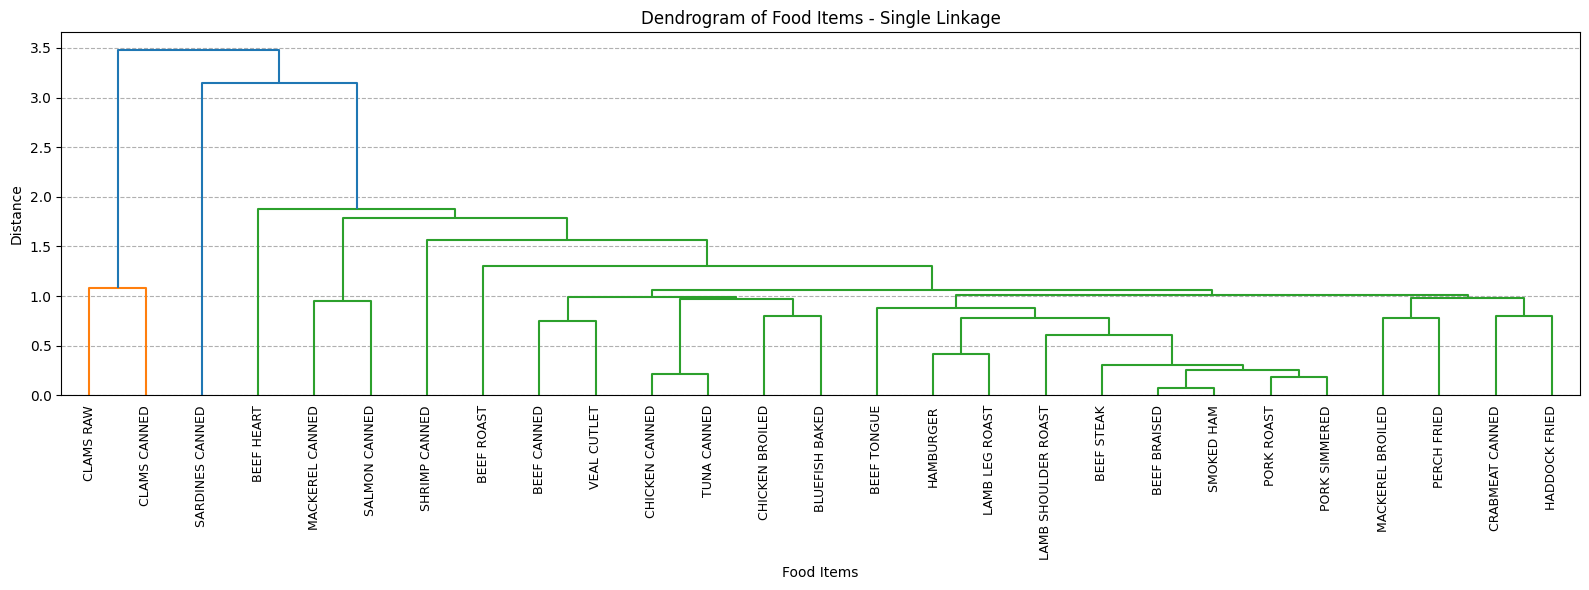


Cluster 1 (single) — 2 items:
CLAMS RAW, CLAMS CANNED
Mean Nutrient Composition:
E(Cal)     57.5
Prot(g)     9.0
Fats(g)     1.0
Ca(mg)     78.0
Fe(mg)      5.7

Cluster 2 (single) — 23 items:
BEEF BRAISED, HAMBURGER, BEEF ROAST, BEEF STEAK, BEEF CANNED, CHICKEN BROILED, CHICKEN CANNED, LAMB LEG ROAST, LAMB SHOULDER ROAST, SMOKED HAM, PORK ROAST, PORK SIMMERED, BEEF TONGUE, VEAL CUTLET, BLUEFISH BAKED, CRABMEAT CANNED, HADDOCK FRIED, MACKEREL BROILED, MACKEREL CANNED, PERCH FRIED, SALMON CANNED, TUNA CANNED, SHRIMP CANNED
Mean Nutrient Composition:
E(Cal)     223.695652
Prot(g)     19.434783
Fats(g)     15.130435
Ca(mg)       28.26087
Fe(mg)       1.934783

Cluster 3 (single) — 1 items:
BEEF HEART
Mean Nutrient Composition:
E(Cal)     160.0
Prot(g)     26.0
Fats(g)      5.0
Ca(mg)      14.0
Fe(mg)       5.9

Cluster 4 (single) — 1 items:
SARDINES CANNED
Mean Nutrient Composition:
E(Cal)     180.0
Prot(g)     22.0
Fats(g)      9.0
Ca(mg)     367.0
Fe(mg)       2.5

Clustering Food Item

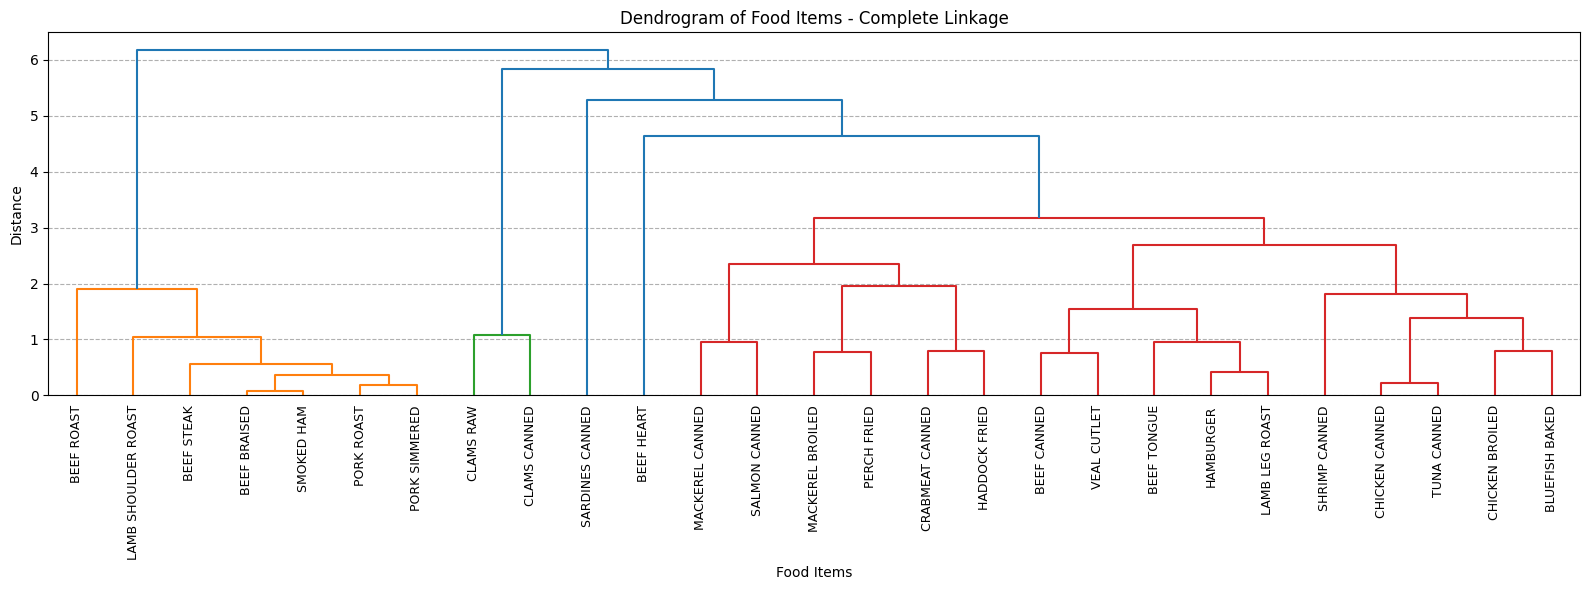


Cluster 1 (complete) — 7 items:
BEEF BRAISED, BEEF ROAST, BEEF STEAK, LAMB SHOULDER ROAST, SMOKED HAM, PORK ROAST, PORK SIMMERED
Mean Nutrient Composition:
E(Cal)     352.857143
Prot(g)     18.571429
Fats(g)     30.142857
Ca(mg)       8.714286
Fe(mg)       2.414286

Cluster 2 (complete) — 2 items:
CLAMS RAW, CLAMS CANNED
Mean Nutrient Composition:
E(Cal)     57.5
Prot(g)     9.0
Fats(g)     1.0
Ca(mg)     78.0
Fe(mg)      5.7

Cluster 3 (complete) — 17 items:
HAMBURGER, BEEF CANNED, CHICKEN BROILED, CHICKEN CANNED, BEEF HEART, LAMB LEG ROAST, BEEF TONGUE, VEAL CUTLET, BLUEFISH BAKED, CRABMEAT CANNED, HADDOCK FRIED, MACKEREL BROILED, MACKEREL CANNED, PERCH FRIED, SALMON CANNED, TUNA CANNED, SHRIMP CANNED
Mean Nutrient Composition:
E(Cal)     166.764706
Prot(g)     20.176471
Fats(g)      8.352941
Ca(mg)      35.470588
Fe(mg)       1.970588

Cluster 4 (complete) — 1 items:
SARDINES CANNED
Mean Nutrient Composition:
E(Cal)     180.0
Prot(g)     22.0
Fats(g)      9.0
Ca(mg)     367.0
Fe(mg

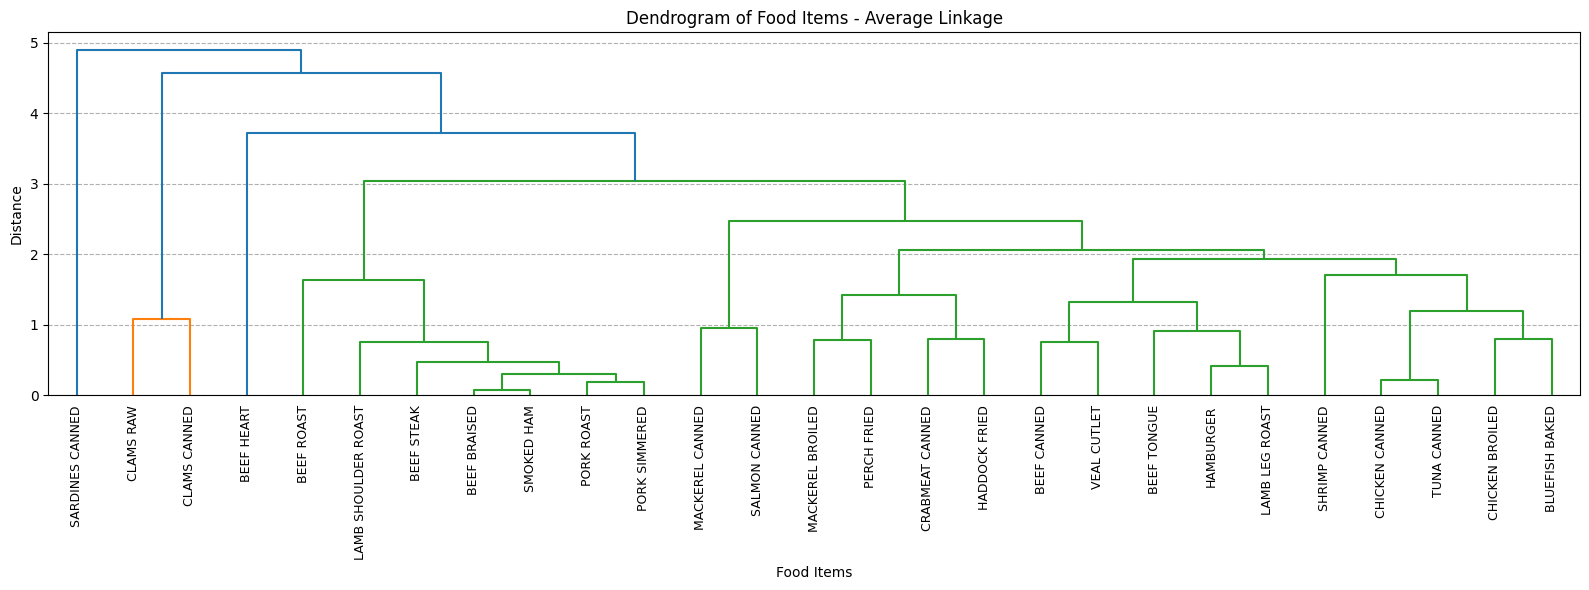


Cluster 1 (average) — 2 items:
CLAMS RAW, CLAMS CANNED
Mean Nutrient Composition:
E(Cal)     57.5
Prot(g)     9.0
Fats(g)     1.0
Ca(mg)     78.0
Fe(mg)      5.7

Cluster 2 (average) — 23 items:
BEEF BRAISED, HAMBURGER, BEEF ROAST, BEEF STEAK, BEEF CANNED, CHICKEN BROILED, CHICKEN CANNED, LAMB LEG ROAST, LAMB SHOULDER ROAST, SMOKED HAM, PORK ROAST, PORK SIMMERED, BEEF TONGUE, VEAL CUTLET, BLUEFISH BAKED, CRABMEAT CANNED, HADDOCK FRIED, MACKEREL BROILED, MACKEREL CANNED, PERCH FRIED, SALMON CANNED, TUNA CANNED, SHRIMP CANNED
Mean Nutrient Composition:
E(Cal)     223.695652
Prot(g)     19.434783
Fats(g)     15.130435
Ca(mg)       28.26087
Fe(mg)       1.934783

Cluster 3 (average) — 1 items:
BEEF HEART
Mean Nutrient Composition:
E(Cal)     160.0
Prot(g)     26.0
Fats(g)      5.0
Ca(mg)      14.0
Fe(mg)       5.9

Cluster 4 (average) — 1 items:
SARDINES CANNED
Mean Nutrient Composition:
E(Cal)     180.0
Prot(g)     22.0
Fats(g)      9.0
Ca(mg)     367.0
Fe(mg)       2.5


In [14]:
linkage_methods = ['single', 'complete', 'average']

for linkage_style in linkage_methods:
    print(f"\nClustering Food Items — {linkage_style.upper()} Linkage")

    Z_objects = linkage(X_scaled_items, method=linkage_style, metric='euclidean')

    plt.figure(figsize=(16, 6))
    dendrogram(Z_objects,
               labels=item_labels,
               leaf_rotation=90,
               leaf_font_size=9,
               color_threshold=0.7 * max(Z_objects[:, 2]))
    plt.title(f"Dendrogram of Food Items - {linkage_style.title()} Linkage")
    plt.xlabel("Food Items")
    plt.ylabel("Distance")
    plt.grid(True, axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

    num_clusters_obj = 4
    labels_obj = fcluster(Z_objects, num_clusters_obj, criterion='maxclust')

    for cid in range(1, num_clusters_obj + 1):
        members = [item_labels[i] for i, label in enumerate(labels_obj) if label == cid]
        print(f"\nCluster {cid} ({linkage_style}) — {len(members)} items:")
        print(", ".join(members))
        cluster_df = df_nutrition[df_nutrition['Food'].isin(members)].iloc[:, 1:]
        print("Mean Nutrient Composition:")
        print(cluster_df.mean().round(2).to_string())

### Interpretation

The clustering of food items using **single**, **complete**, and **average linkage** methods.

#### Single Linkage
- **Cluster 1**: `CLAMS RAW`, `CLAMS CANNED` — Low fat/calories, high **calcium**/**iron**.
- **Cluster 2**: 23 mixed items — Balanced nutrients.
- **Cluster 3**: `BEEF HEART` — High **protein** and **iron**.
- **Cluster 4**: `SARDINES CANNED` — Extremely high **calcium**.


#### Complete Linkage
- **Cluster 1**: Fat-rich red meats (e.g., `BEEF ROAST`, `PORK ROAST`).
- **Cluster 2**: `CLAMS RAW`, `CLAMS CANNED` — High **minerals**, low fat.
- **Cluster 3**: Lean meats/fish — Moderate fat, good protein.
- **Cluster 4**: `SARDINES CANNED` — Outlier for **calcium**.

#### Average Linkage
- **Cluster 1**: `CLAMS RAW`, `CLAMS CANNED`.
- **Cluster 2**: 23 common items — Mixed meat/poultry/fish.
- **Cluster 3**: `BEEF HEART`.
- **Cluster 4**: `SARDINES CANNED`.

### Key Takeaways
- **CLAMS** and **SARDINES** are consistent outliers due to mineral content.
- **BEEF HEART** is protein/iron-rich and often isolated.
- Core cluster (23 items) shares average nutrient profiles across methods.

## Hierarchical Clustering of Nutrients (Features)

We now repeat the clustering process, but this time on **transposed data** so each row is a nutrient feature.
This reveals how nutrients (e.g., energy and fat) may be related across the dataset.

For each linkage:
- Generate dendrogram of nutrients
- Form feature clusters (e.g. 3 clusters)
- Print grouped nutrients



Clustering Nutrients — SINGLE Linkage


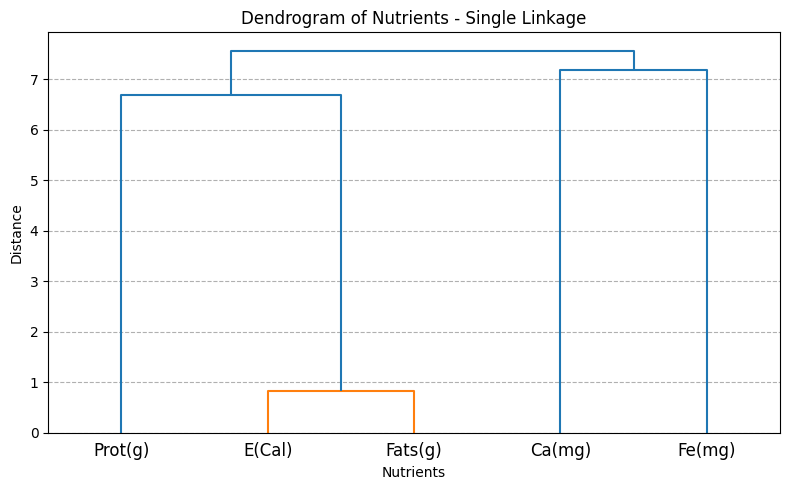

Cluster 1 (single): E(Cal), Prot(g), Fats(g)
Cluster 2 (single): Ca(mg)
Cluster 3 (single): Fe(mg)

Clustering Nutrients — COMPLETE Linkage


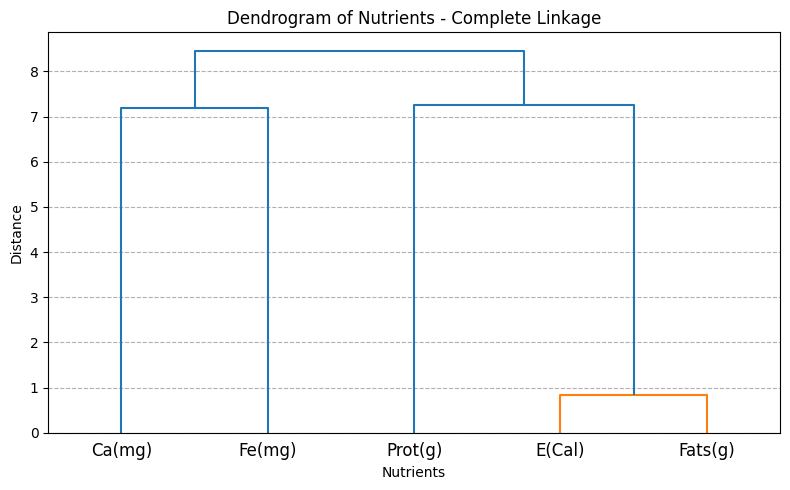

Cluster 1 (complete): Ca(mg), Fe(mg)
Cluster 2 (complete): E(Cal), Fats(g)
Cluster 3 (complete): Prot(g)

Clustering Nutrients — AVERAGE Linkage


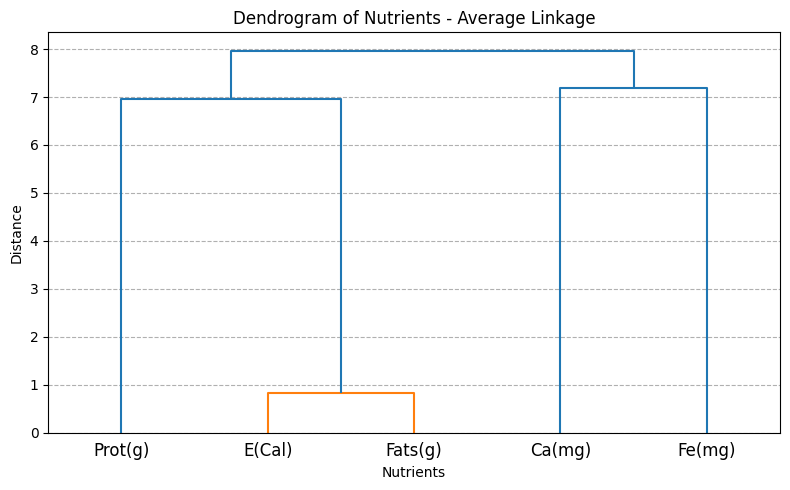

Cluster 1 (average): E(Cal), Prot(g), Fats(g)
Cluster 2 (average): Ca(mg)
Cluster 3 (average): Fe(mg)


In [15]:
X_scaled_features = X_scaled_items.T

for linkage_style in linkage_methods:
    print(f"\nClustering Nutrients — {linkage_style.upper()} Linkage")

    Z_features = linkage(X_scaled_features, method=linkage_style, metric='euclidean')

    plt.figure(figsize=(8, 5))
    dendrogram(Z_features,
               labels=feature_labels,
               leaf_font_size=12,
               color_threshold=0.7 * max(Z_features[:, 2]))
    plt.title(f"Dendrogram of Nutrients - {linkage_style.title()} Linkage")
    plt.xlabel("Nutrients")
    plt.ylabel("Distance")
    plt.grid(True, axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

    num_clusters_feat = 3
    labels_feat = fcluster(Z_features, num_clusters_feat, criterion='maxclust')

    for cid in range(1, num_clusters_feat + 1):
        group = [feature_labels[i] for i, label in enumerate(labels_feat) if label == cid]
        print(f"Cluster {cid} ({linkage_style}): {', '.join(group)}")

### Interpretation

- **Single Linkage**:  
  Groups `E(Cal)`, `Prot(g)`, and `Fats(g)` together, indicating their close relationship in contributing to the overall energy profile. `Ca(mg)` and `Fe(mg)` are treated as distinct, suggesting they vary independently of caloric components.

- **Complete Linkage**:  
  Pairs `Ca(mg)` and `Fe(mg)` in one cluster (both are minerals), and `E(Cal)` with `Fats(g)` (highlighting fat’s role in calories). `Prot(g)` stands alone, possibly due to unique variance across foods.

- **Average Linkage**:  
  Matches the structure of single linkage, again clustering `E(Cal)`, `Prot(g)`, and `Fats(g)` together, reinforcing their close nutritional interplay. `Ca(mg)` and `Fe(mg)` remain separate.

These results suggest a consistent pattern where energy-related nutrients (calories, fats, and protein) cluster together, while calcium and iron form their own groups, reflecting different dietary functions and variability.